In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.formula.api as sm
import statsmodels.api as smf
%matplotlib inline

In [2]:
from Parameters import *
from Run_LCA_model import Run_LCA_model

In [3]:
buildings_path = '..\shapefiles\\building_block_people_WGS_3_int.csv'
schedule = 'scheduled' 
logistics = 'grid'
n_collection = 1
Result_Energy_m3 = pd.DataFrame()
Result_GHG_m3 = pd.DataFrame()
Result_COST_m3 = pd.DataFrame()
i=2
while i < 100:
    n_regen = i
    Total_Energy_m3, Total_GHG_m3, Total_COST_m3= Run_LCA_model(buildings_path, n_regen, n_collection, schedule, logistics)
    Result_Energy_m3 = Result_Energy_m3.append(Total_Energy_m3)
    Result_GHG_m3 = Result_GHG_m3.append(Total_GHG_m3)
    Result_COST_m3 = Result_COST_m3.append(Total_COST_m3)
    print (i)
    if i<10:
        i = i + 2
    else:
        i = i+10

Start calculating distances for scheduled...
calc distances took time 8.18610167503357
2
Start calculating distances for scheduled...
calc distances took time 12.553321361541748
4
Start calculating distances for scheduled...
calc distances took time 19.904478549957275
6
Start calculating distances for scheduled...
calc distances took time 16.22652268409729
8
Start calculating distances for scheduled...
calc distances took time 18.672661304473877
10
Start calculating distances for scheduled...
calc distances took time 18.349340677261353
20
Start calculating distances for scheduled...
calc distances took time 17.90964698791504
30
Start calculating distances for scheduled...
calc distances took time 20.275591611862183
40
Start calculating distances for scheduled...
calc distances took time 20.231276988983154
50
Start calculating distances for scheduled...
calc distances took time 21.438345193862915
60
Start calculating distances for scheduled...
calc distances took time 22.54442286491394


In [5]:
Result_Energy_m3["sum"] = (Result_Energy_m3.sum(axis=1)) - Result_Energy_m3["n_facilities"]
Result_GHG_m3["sum"] = (Result_GHG_m3.sum(axis=1)) - Result_GHG_m3["n_facilities"]

In [6]:
Result_Energy_m3

,Resin manufacturing,Resin transport,Catridge manufacturing,Catridge transport,Tank manufacturing,Tank transport,Pump operation,Pump manufacturing,Pump transport,Acid manufacturing,Acid transport,Logistics_regen,trucks manufacturing,Logistics_collect,n_facilities,sum
0,6.49986,0.004283,0.634022,0.000161,0.002021,0.000161,0.017306,0.008528,0.000803,0.732507,0.008030,8.339627,1.722579,0.014864,2,17.984752
0,6.49986,0.006070,0.634022,0.000228,0.002034,0.000228,0.024527,0.012086,0.001138,0.732507,0.011380,6.626019,1.229283,0.015895,4,15.795277
0,6.49986,0.008557,0.634022,0.000321,0.002049,0.000321,0.034579,0.017040,0.001604,0.732507,0.016045,6.536433,1.298611,0.015635,6,15.797585
0,6.49986,0.011360,0.634022,0.000426,0.002064,0.000426,0.045906,0.022621,0.002130,0.732507,0.021300,6.256976,1.300857,0.014826,8,15.545282
0,6.49986,0.017414,0.634022,0.000653,0.002091,0.000653,0.070369,0.034676,0.003265,0.732507,0.032651,5.946155,1.300570,0.019376,10,15.294263
0,6.49986,0.029613,0.634022,0.001110,0.002133,0.001110,0.119663,0.058967,0.005552,0.732507,0.055524,5.735997,1.298205,0.022491,20,15.196756
0,6.49986,0.044703,0.634022,0.001676,0.002172,0.001676,0.180640,0.089015,0.008382,0.732507,0.083817,5.515231,1.270772,0.025623,30,15.090097
0,6.49986,0.062632,0.634022,0.002349,0.002214,0.002349,0.253090,0.124717,0.011743,0.732507,0.117434,5.361090,1.263700,0.028740,40,15.096448
0,6.49986,0.083495,0.634022,0.003131,0.002252,0.003131,0.337395,0.166261,0.015655,0.732507,0.156552,5.154849,1.216850,0.031889,50,15.037849
0,6.49986,0.093875,0.634022,0.003520,0.002271,0.003520,0.379340,0.186930,0.017601,0.732507,0.176015,5.084057,1.205024,0.035123,60,15.053666


Result_Energy_m3 = pd.read_csv('Energy_result.csv')
Result_GHG_m3 = pd.read_csv('GHG_result.csv')

Result_Energy_m3=pd.read_csv('Energy_result_unscheduled.csv')
Result_GHG_m3=pd.read_csv('GHG_result_unscheduled.csv')

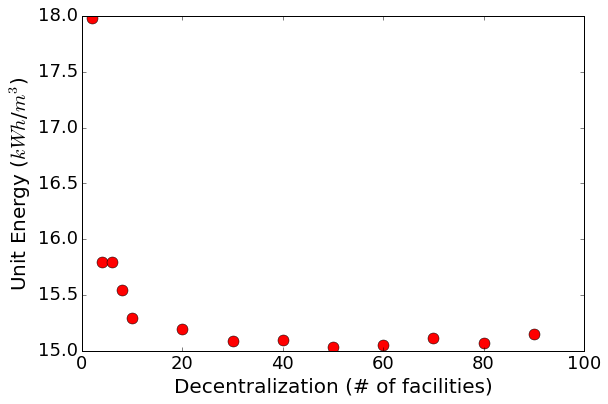

In [7]:
fig = plt.figure(figsize=(9,6))
plt.plot(Result_Energy_m3["n_facilities"], Result_Energy_m3["sum"], 'ro', markersize=11)
plt.xticks(fontsize = 18)
plt.xlim(0,100)
#plt.ylim(50,100)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.yticks(fontsize = 18)
plt.ylabel('Unit Energy ($kWh$/$m^3$)', fontsize = 20)

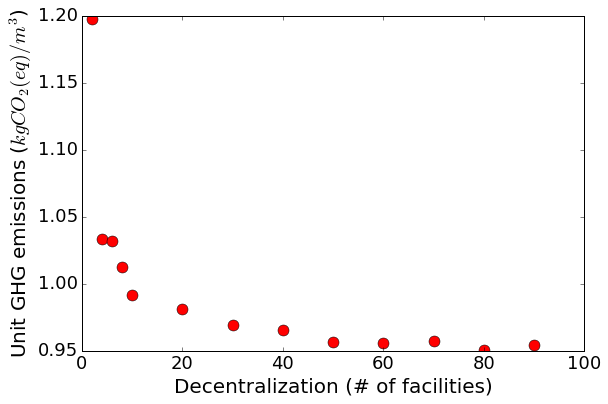

In [8]:
fig = plt.figure(figsize=(9,6))
plt.plot(Result_GHG_m3["n_facilities"], Result_GHG_m3["sum"], 'ro', markersize=11)
plt.xticks(fontsize = 18)
plt.xlim(0,100)
#plt.ylim(3.5,4.5)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.yticks(fontsize = 18)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)', fontsize = 20)

In [9]:
Result_Energy_m3_plot = Result_Energy_m3.drop('sum',1).drop('n_facilities',1)
Result_GHG_m3_plot = Result_GHG_m3.drop('sum',1).drop('n_facilities',1)

In [10]:
Result_Energy_m3_plot['other'] = (Result_Energy_m3_plot['Resin transport'] + Result_Energy_m3_plot['Catridge transport']+
                                  Result_Energy_m3_plot['Tank transport'] + Result_Energy_m3_plot['Pump transport'] +
                                  Result_Energy_m3_plot['Acid transport']+ Result_Energy_m3_plot['Tank manufacturing'] +
                                 Result_Energy_m3_plot['Pump manufacturing'])
Result_GHG_m3_plot['other'] = (Result_GHG_m3_plot['Resin transport'] + Result_GHG_m3_plot['Catridge transport']+
                                  Result_GHG_m3_plot['Tank transport'] + Result_GHG_m3_plot['Pump transport'] +
                                  Result_GHG_m3_plot['Acid transport'] + Result_GHG_m3_plot['Tank manufacturing'] +
                                 Result_GHG_m3_plot['Pump manufacturing'])

Result_Energy_m3_plot = Result_Energy_m3_plot.drop(['Resin transport', 'Catridge transport', 
                                                    'Tank transport', 'Pump transport', 'Acid transport', 'Tank manufacturing',
                                                   'Pump manufacturing'] , 1)
Result_GHG_m3_plot = Result_GHG_m3_plot.drop(['Resin transport', 'Catridge transport', 
                                                    'Tank transport', 'Pump transport', 'Acid transport', 'Tank manufacturing',
                                                   'Pump manufacturing'] , 1)

In [11]:
Result_Energy_m3_plot_low = Result_Energy_m3_plot[0:1]
Result_GHG_m3_plot_low = Result_GHG_m3_plot[0:1]
Result_Energy_m3_plot_high = Result_Energy_m3_plot[8:9]
Result_GHG_m3_plot_high = Result_GHG_m3_plot[8:9]

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8]),
 <a list of 10 Text yticklabel objects>)

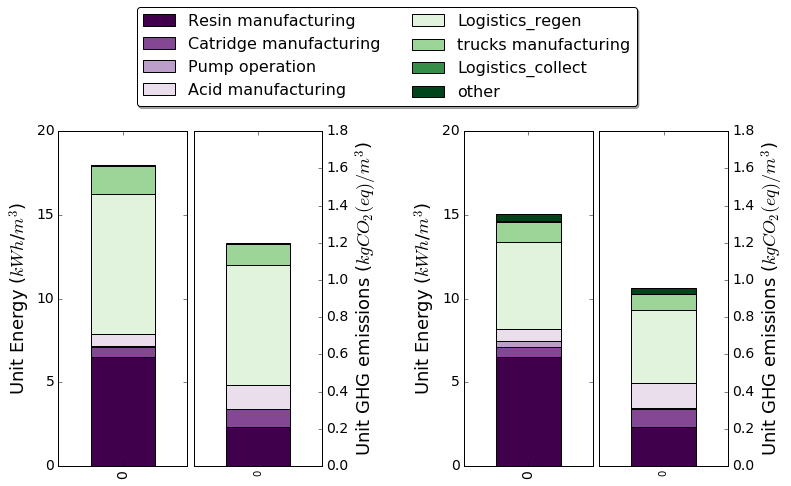

In [18]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,5, 1)
a=Result_Energy_m3_plot_low.plot(kind='bar', stacked = True, ax=ax, legend=False,colormap='PRGn')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 20)
plt.ylabel('Unit Energy ($kWh$/$m^3$)',fontsize=18)
ax = fig.add_subplot(1,5, 2)
b=Result_GHG_m3_plot_low.plot(kind='bar', stacked = True, secondary_y=True, ax=ax, legend=False,colormap='PRGn')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 1.8)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)',fontsize=18)
b.legend(loc='lower center', bbox_to_anchor=(1.5, 1.05),ncol=2, fancybox=True, shadow=True,fontsize=16)
ax = fig.add_subplot(1,5, 4)
c=Result_Energy_m3_plot_high.plot(kind='bar', stacked = True,ax=ax, legend=False,colormap='PRGn')
plt.ylim(0, 20)
plt.ylabel('Unit Energy ($kWh$/$m^3$)',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax = fig.add_subplot(1,5, 5)
d=Result_GHG_m3_plot_high.plot(kind='bar', stacked = True, ax=ax, secondary_y=True, legend=False,colormap='PRGn')
plt.ylim(0, 1.8)
#fig.tight_layout()
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)',fontsize=18)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=None)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [19]:
Result_Energy_m3.to_csv('../results/Energy_m3_%s.csv'% (logistics)) 
Result_GHG_m3.to_csv('../results/GHG_m3_%s.csv'% (logistics)) 

In [20]:
Energy_optimal = pd.read_csv('../results/Energy_m3_optimal.csv')
Energy_grid = pd.read_csv('../results/Energy_m3_grid.csv')
Energy_random = pd.read_csv('../results/Energy_m3_random.csv')
GHG_optimal = pd.read_csv('../results/GHG_m3_optimal.csv')
GHG_grid = pd.read_csv('../results/GHG_m3_grid.csv')
GHG_random = pd.read_csv('../results/GHG_m3_random.csv')

In [21]:
Energy_optimal_log= Energy_optimal
Energy_optimal_log['logx'] = np.log(Energy_optimal_log['n_facilities'])
Energy_optimal_log['logEnergy'] = np.log(Energy_optimal_log['sum'])
energy_optimal = np.array(Energy_optimal_log['logEnergy'])
scale_optimal = np.array(Energy_optimal_log['logx'])

Energy_grid_log= Energy_grid
Energy_grid_log['logx'] = np.log(Energy_grid_log['n_facilities'])
Energy_grid_log['logEnergy'] = np.log(Energy_grid_log['sum'])
energy_grid = np.array(Energy_grid_log['logEnergy'])
scale_grid = np.array(Energy_grid_log['logx'])

Energy_random_log= Energy_random
Energy_random_log['logx'] = np.log(Energy_random_log['n_facilities'])
Energy_random_log['logEnergy'] = np.log(Energy_random_log['sum'])
energy_random = np.array(Energy_random_log['logEnergy'])
scale_random = np.array(Energy_random_log['logx'])

GHG_optimal_log = GHG_optimal
GHG_optimal_log['logx'] = np.log(GHG_optimal_log['n_facilities'])
GHG_optimal_log['logGHG'] = np.log(GHG_optimal_log['sum'])
GHG_optimal = np.array(GHG_optimal_log['logGHG'])

GHG_grid_log= GHG_grid
GHG_grid_log['logx'] = np.log(GHG_grid_log['n_facilities'])
GHG_grid_log['logGHG'] = np.log(GHG_grid_log['sum'])
GHG_grid = np.array(GHG_grid_log['logGHG'])

GHG_random_log= GHG_random
GHG_random_log['logx'] = np.log(GHG_random_log['n_facilities'])
GHG_random_log['logGHG'] = np.log(GHG_random_log['sum'])
GHG_random = np.array(GHG_random_log['logGHG'])


In [22]:
X_optimal = smf.add_constant(scale_optimal)
model = smf.OLS(energy_optimal , X_optimal)
results_optimal_energy = model.fit()

X_grid = smf.add_constant(scale_grid)
model = smf.OLS(energy_grid , X_grid)
results_grid_energy = model.fit()

X_random = smf.add_constant(scale_random)
model = smf.OLS(energy_random , X_random)
results_random_energy = model.fit()

X_optimal_GHG = smf.add_constant(scale_optimal)
model = smf.OLS(GHG_optimal , X_optimal_GHG)
results_optimal_GHG = model.fit()

X_grid_GHG = smf.add_constant(scale_grid)
model = smf.OLS(GHG_grid , X_grid_GHG)
results_grid_GHG = model.fit()

X_random_GHG = smf.add_constant(scale_random)
model = smf.OLS(GHG_random , X_random_GHG)
results_random_GHG = model.fit()

In [23]:
x1 = np.linspace(0,100, 500) # 100 linearly spaced numbers
y1_optimal = (x1**(results_optimal_energy.params[1]))*math.exp(results_optimal_energy.params[0])
aa=list(zip(x1,y1_optimal))
pl_optimal=pd.DataFrame(aa)
pl_optimal.columns=['x','iso-distant']

y1_grid = (x1**(results_grid_energy.params[1]))*math.exp(results_grid_energy.params[0])
aa=list(zip(x1,y1_grid))
pl_grid=pd.DataFrame(aa)
pl_grid.columns=['x','grid']

y1_random = (x1**(results_random_energy.params[1]))*math.exp(results_random_energy.params[0])
aa=list(zip(x1,y1_random))
pl_random=pd.DataFrame(aa)
pl_random.columns=['x','random']

y1_optimal_GHG = (x1**(results_optimal_GHG.params[1]))*math.exp(results_optimal_GHG.params[0])
aa=list(zip(x1,y1_optimal_GHG))
pl_optimal_GHG=pd.DataFrame(aa)
pl_optimal_GHG.columns=['x','iso-distant']

y1_grid_GHG = (x1**(results_grid_GHG.params[1]))*math.exp(results_grid_GHG.params[0]) 
aa=list(zip(x1,y1_grid_GHG))
pl_grid_GHG=pd.DataFrame(aa)
pl_grid_GHG.columns=['x','grid']

y1_random_GHG = (x1**(results_random_GHG.params[1]))*math.exp(results_grid_GHG.params[0]) 
aa=list(zip(x1,y1_random_GHG))
pl_random_GHG=pd.DataFrame(aa)
pl_random_GHG.columns=['x','random']

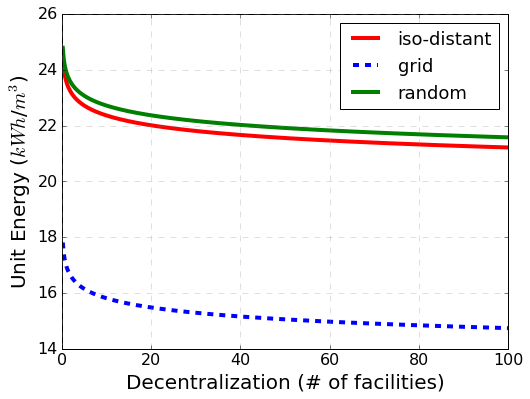

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize=(8, 6))
f = pl_optimal.plot( x='x', y='iso-distant',fontsize=16, c='r', ax=ax, linewidth=4)
g = pl_grid.plot( x='x', y='grid',fontsize=16, c='b',linestyle='--', ax=ax, linewidth=4)
h = pl_random.plot( x='x', y='random',fontsize=16, c='g', ax=ax, linewidth=4)
h.legend(fontsize=18)
#plt.ylim(20,27)
plt.grid(which='major', color='grey', linestyle='--', alpha = 0.5)
plt.ylabel('Unit Energy ($kWh$/$m^3$)',fontsize=20)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)

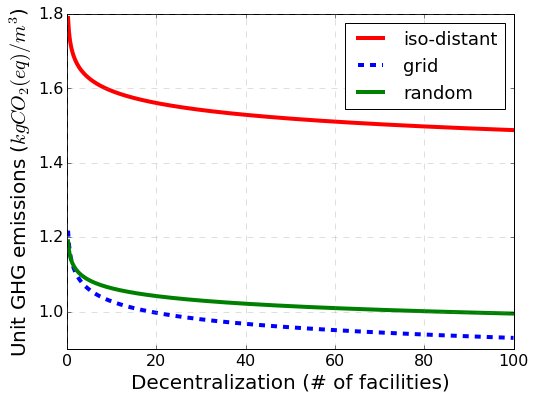

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize=(8, 6))
f = pl_optimal_GHG.plot( x='x', y='iso-distant',fontsize=16, c='r', ax=ax, linewidth=4)
g = pl_grid_GHG.plot( x='x', y='grid',fontsize=16, c='b',linestyle='--', ax=ax, linewidth=4)
h = pl_random_GHG.plot( x='x', y='random',fontsize=16, c='g', ax=ax, linewidth=4)
h.legend(fontsize=18)
#plt.ylim(1.35, 2)
plt.grid(which='major', color='grey', linestyle='--', alpha = 0.5)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)',fontsize=20)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)